In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [8]:
random.seed(42)
arms = 20
iterations = 1000
test_size = 2000
epsilon =[0,0.01,0.1]
testbed = np.random.rand(test_size,arms)
optim_arm = np.argmax(testbed,axis=1)
alpha = 0.1

##Epsilon Greedy

In [9]:
avg_reward_greedy = np.zeros((iterations,len(epsilon)))
avg_optim_greedy = np.zeros((iterations,len(epsilon)))
for n,e in enumerate(epsilon) :
  rewards = np.zeros((test_size,iterations))
  optim_count = np.zeros((test_size,iterations))
  for j in range(test_size):
    Q = np.zeros(arms)
    count = np.ones(arms)
    for i in range(1,iterations):
      if random.random() <= e:
        A = random.randint(0,arms-1)
      else:
        A = np.argmax(Q)
      r = random.normalvariate(testbed[j,A],1)
      rewards[j,i] = r
      count[A]+=1
      optim_count[j,i] = 1 if A == optim_arm[j] else 0
      Q[A] = Q[A]+(1/count[A])*(r-Q[A])
  avg_reward_greedy[:,n] = np.mean(rewards,axis=0)
  avg_optim_greedy[:,n] = np.mean(optim_count,axis=0)

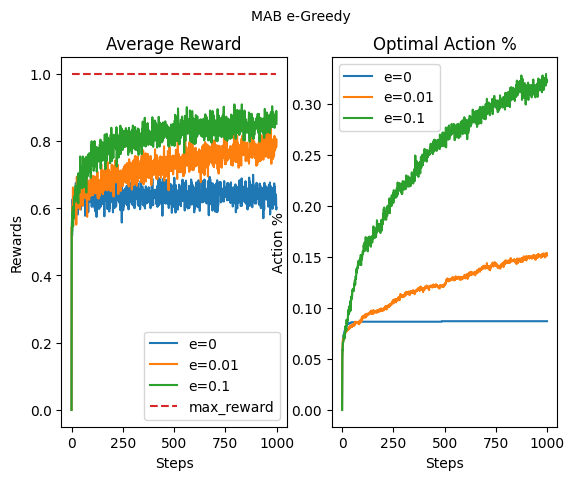

In [10]:
plt.subplot(1,2,1)
plt.plot(avg_reward_greedy[:,0])
plt.plot(avg_reward_greedy[:,1])
plt.plot(avg_reward_greedy[:,2])
plt.plot(np.ones(iterations)*(np.mean(np.max(testbed,axis=0))),'--')
plt.legend(['e=0','e=0.01','e=0.1','max_reward'])
plt.xlabel('Steps')
plt.ylabel('Rewards')
plt.title('Average Reward')
plt.subplot(1,2,2)
plt.plot(avg_optim_greedy[:,0])
plt.plot(avg_optim_greedy[:,1])
plt.plot(avg_optim_greedy[:,2])
plt.title('Optimal Action %')
plt.xlabel('Steps')
plt.ylabel('Action %')
plt.legend(['e=0','e=0.01','e=0.1'])
plt.suptitle('MAB e-Greedy',fontsize=10)
plt.show()

##Optimistic Intial Value

In [11]:
avg_reward_optim = np.zeros((iterations,len(epsilon)))
avg_optim_optim = np.zeros((iterations,len(epsilon)))
for n,e in enumerate(epsilon) :
  rewards = np.zeros((test_size,iterations))
  optim_count = np.zeros((test_size,iterations))
  for j in range(test_size):
    Q = np.ones(arms)*4
    count = np.ones(arms)
    for i in range(1,iterations):
      if random.random() <= e:
        A = random.randint(0,arms-1)
      else:
        A = np.argmax(Q)
      r = random.normalvariate(testbed[j,A],1)
      rewards[j,i] = r
      count[A]+=1
      optim_count[j,i] = 1 if A == optim_arm[j] else 0
      Q[A] = Q[A]+(1/count[A])*(r-Q[A])
  avg_reward_optim[:,n] = np.mean(rewards,axis=0)
  avg_optim_optim[:,n] = np.mean(optim_count,axis=0)

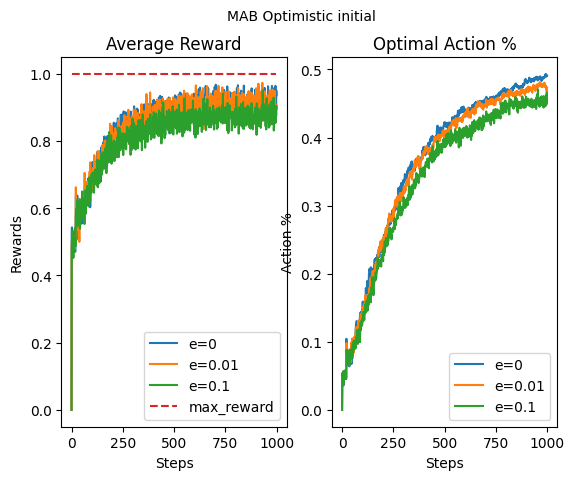

In [12]:
plt.subplot(1,2,1)
plt.plot(avg_reward_optim[:,0])
plt.plot(avg_reward_optim[:,1])
plt.plot(avg_reward_optim[:,2])
plt.plot(np.ones(iterations)*(np.mean(np.max(testbed,axis=0))),'--')
plt.legend(['e=0','e=0.01','e=0.1','max_reward'])
plt.xlabel('Steps')
plt.ylabel('Rewards')
plt.title('Average Reward')
plt.subplot(1,2,2)
plt.plot(avg_optim_optim[:,0])
plt.plot(avg_optim_optim[:,1])
plt.plot(avg_optim_optim[:,2])
plt.title('Optimal Action %')
plt.xlabel('Steps')
plt.ylabel('Action %')
plt.legend(['e=0','e=0.01','e=0.1'])
plt.suptitle('MAB Optimistic initial',fontsize=10)
plt.show()

##UCB Algorithm

In [13]:
avg_reward_ucb = np.zeros((iterations,len(epsilon)))
avg_optim_ucb = np.zeros((iterations,len(epsilon)))
for n,e in enumerate(epsilon) :
  rewards = np.zeros((test_size,iterations))
  optim_count = np.zeros((test_size,iterations))
  for j in range(test_size):
    Q = np.zeros(arms)
    count = np.ones(arms)
    for i in range(1,iterations):
      confidence_bound = 2 * np.sqrt(np.log(i + 1) / count)
      if random.random() <= e:
        A = random.randint(0,arms-1)
      else:
        A = np.argmax(Q+confidence_bound)
      r = random.normalvariate(testbed[j,A],1)
      rewards[j,i] = r
      count[A]+=1
      optim_count[j,i] = 1 if A == optim_arm[j] else 0
      Q[A] = Q[A]+(1/count[A])*(r-Q[A])
  avg_reward_ucb[:,n] = np.mean(rewards,axis=0)
  avg_optim_ucb[:,n] = np.mean(optim_count,axis=0)

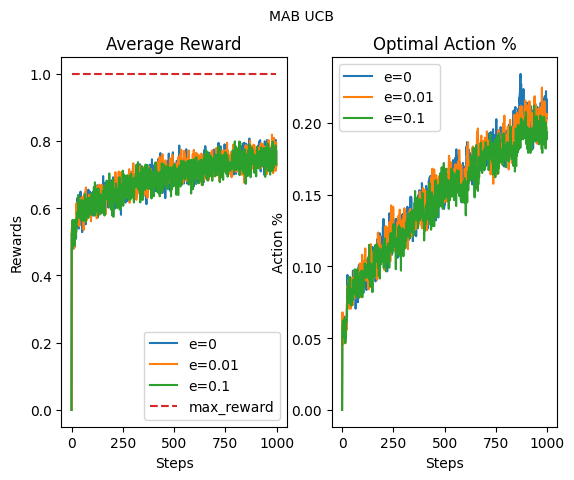

In [14]:
plt.subplot(1,2,1)
plt.plot(avg_reward_ucb[:,0])
plt.plot(avg_reward_ucb[:,1])
plt.plot(avg_reward_ucb[:,2])
plt.plot(np.ones(iterations)*(np.mean(np.max(testbed,axis=0))),'--')
plt.legend(['e=0','e=0.01','e=0.1','max_reward'])
plt.xlabel('Steps')
plt.ylabel('Rewards')
plt.title('Average Reward')
plt.subplot(1,2,2)
plt.plot(avg_optim_ucb[:,0])
plt.plot(avg_optim_ucb[:,1])
plt.plot(avg_optim_ucb[:,2])
plt.title('Optimal Action %')
plt.xlabel('Steps')
plt.ylabel('Action %')
plt.legend(['e=0','e=0.01','e=0.1'])
plt.suptitle('MAB UCB',fontsize=10)
plt.show()

##Gradient Bandit Algorithm

In [15]:
avg_reward_grad = np.zeros((iterations,len(epsilon)))
avg_optim_grad = np.zeros((iterations,len(epsilon)))
for n,e in enumerate(epsilon) :
  rewards = np.zeros((test_size,iterations))
  optim_count = np.zeros((test_size,iterations))
  for j in range(test_size):
    H = np.ones(arms)
    count = np.ones(arms)
    for i in range(1,iterations):
      exp_H = np.exp(H - np.max(H))
      policy = exp_H / np.sum(exp_H)
      A = np.random.choice(arms,p=policy)
      r = random.normalvariate(testbed[j,A],1)
      rewards[j,i] = r
      count[A]+=1
      optim_count[j,i] = 1 if A == optim_arm[j] else 0
      for a in range(len(H)):
        if(a==A):
          H[a] = H[a]+alpha*(r-np.mean(rewards[j,:i]))*(1-policy[a])
        else:
          H[a] = H[a]-alpha*(r-np.mean(rewards[j,:i]))*(policy[a])
  avg_reward_grad[:,n] = np.mean(rewards,axis=0)
  avg_optim_grad[:,n] = np.mean(optim_count,axis=0)

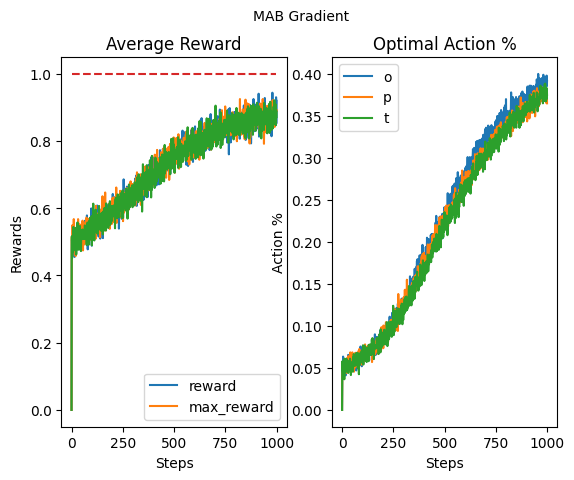

In [16]:
plt.subplot(1,2,1)
plt.plot(avg_reward_grad)
plt.plot(np.ones(iterations)*(np.mean(np.max(testbed,axis=0))),'--')
plt.legend(['reward','max_reward'])
plt.xlabel('Steps')
plt.ylabel('Rewards')
plt.title('Average Reward')
plt.subplot(1,2,2)
plt.plot(avg_optim_grad)
plt.title('Optimal Action %')
plt.xlabel('Steps')
plt.ylabel('Action %')
plt.legend('optimal Action%')
plt.suptitle('MAB Gradient',fontsize=10)
plt.show()

##Comparision

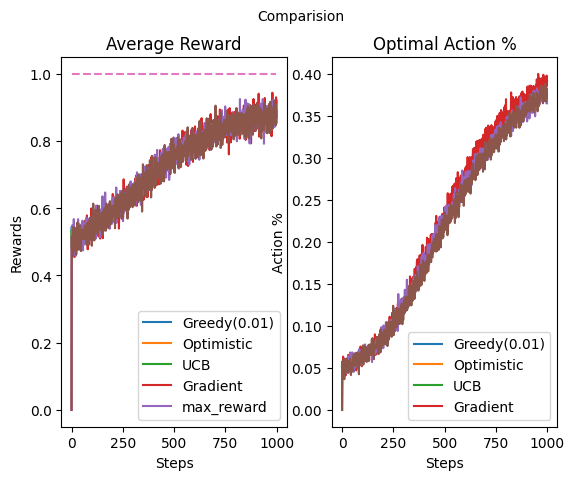

In [17]:
plt.subplot(1,2,1)
plt.plot(avg_reward_greedy[1])
plt.plot(avg_reward_optim[1])
plt.plot(avg_reward_ucb[1])
plt.plot(avg_reward_grad)
plt.plot(np.ones(iterations)*(np.mean(np.max(testbed,axis=0))),'--')
plt.legend(['Greedy(0.01)','Optimistic','UCB','Gradient','max_reward'])
plt.xlabel('Steps')
plt.ylabel('Rewards')
plt.title('Average Reward')
plt.subplot(1,2,2)
plt.plot(avg_optim_greedy[1])
plt.plot(avg_optim_optim[1])
plt.plot(avg_optim_ucb[1])
plt.plot(avg_optim_grad)
plt.title('Optimal Action %')
plt.xlabel('Steps')
plt.ylabel('Action %')
plt.legend(['Greedy(0.01)','Optimistic','UCB','Gradient'])
plt.suptitle('Comparision',fontsize=10)
plt.show()

